In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [3]:
movie_gross = pd.read_csv('bom.movie_gross.csv.gz')

conn = sqlite3.connect('im.db')
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
conn.close()

In [4]:
print(movie_gross.isnull().sum())
print(movie_basics.isnull().sum())
print(movie_ratings.isnull().sum())

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64
movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64
movie_id         0
averagerating    0
numvotes         0
dtype: int64


In [5]:
movie_gross = movie_gross.dropna()

In [6]:
print(movie_gross.head())
print(movie_basics.head())
print(movie_ratings.head())

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wanderi

In [7]:
merged_data = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

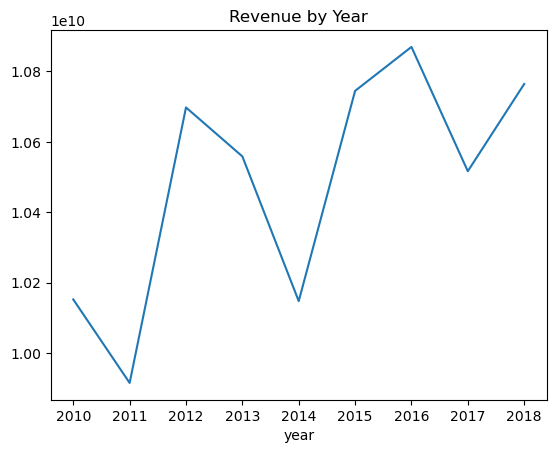

In [22]:
revenue_by_year = movie_gross.groupby('year')['domestic_gross'].sum()
revenue_by_year.plot(kind='line', title='Revenue by Year')
plt.show()

In [27]:
# Convert columns to numeric, coercing errors to NaN
movie_gross['domestic_gross'] = pd.to_numeric(movie_gross['domestic_gross'], errors='coerce')
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'], errors='coerce')

In [28]:
print(movie_gross.isnull().sum())

title             0
studio            0
domestic_gross    0
foreign_gross     5
year              0
dtype: int64


In [29]:
movie_gross.fillna(0, inplace=True)  

                                                  title  domestic_percentage  \
0                                           toy story 3            38.894096   
1                            alice in wonderland (2010)            32.588981   
2           harry potter and the deathly hallows part 1            30.823701   
3                                             inception            35.325365   
4                                   shrek forever after            31.716715   
...                                                 ...                  ...   
3275                                    i still see you             0.093246   
3286                              the catcher was a spy            75.995807   
3309                                         time freak             3.759398   
3342  reign of judges: title of liberty - concept short            94.715447   
3353            antonio lopez 1970: sex fashion & disco            59.016393   

      foreign_percentage  
0           

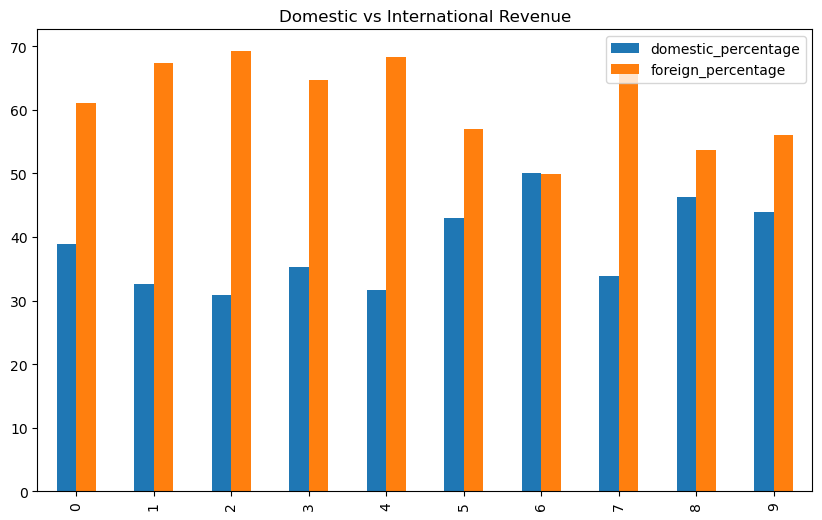

In [34]:
print(movie_gross[['title', 'domestic_percentage', 'foreign_percentage']])

movie_gross[['domestic_percentage', 'foreign_percentage']].head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Domestic vs International Revenue')
plt.show()

In [37]:
top_rated = merged_data.sort_values('averagerating', ascending=False).head(10)
print(top_rated[['original_title', 'averagerating', 'numvotes']])

                                          original_title  averagerating  \
51109                    Fly High: Story of the Disc Dog           10.0   
65944                                     Calamity Kevin           10.0   
71577                      Pick It Up! - Ska in the '90s           10.0   
73616                                           Renegade           10.0   
65755  Ellis Island: The Making of a Master Race in A...           10.0   
878            The Dark Knight: The Ballad of the N Word           10.0   
64646    A Dedicated Life: Phoebe Brand Beyond the Group           10.0   
9745                                Freeing Bernie Baran           10.0   
702       Exteriores: Mulheres Brasileiras na Diplomacia           10.0   
49925                          Dog Days in the Heartland           10.0   

       numvotes  
51109         7  
65944         6  
71577         5  
73616        20  
65755         6  
878           5  
64646         5  
9745          5  
702         

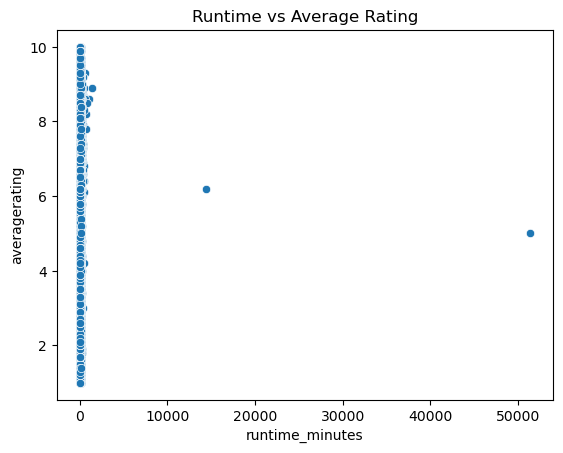

In [38]:
sns.scatterplot(data=merged_data, x='runtime_minutes', y='averagerating')
plt.title('Runtime vs Average Rating')
plt.show()

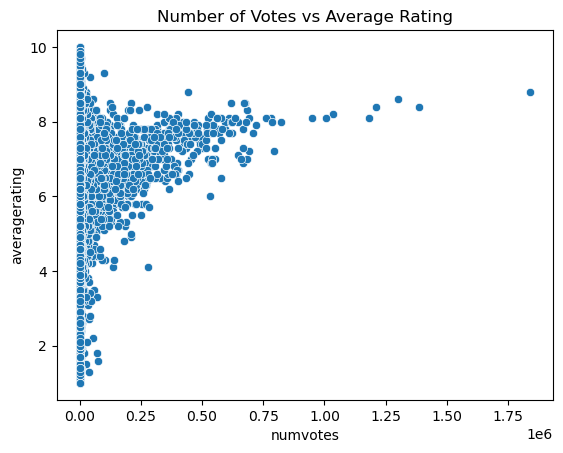

In [39]:
sns.scatterplot(data=merged_data, x='numvotes', y='averagerating')
plt.title('Number of Votes vs Average Rating')
plt.show()